In [1]:
# call system commands - move csv file into the working folder - to be updated later

import os as os
os.system('ls')
os.system('date')
os.system('echo mv files to dropbox - mv /home/tester/Downloads/*.csv /home/tester/GitHub/AlgoTrading/CourseOfSale/data/...')
os.system('mv /home/tester/Downloads/*.csv  /home/tester/GitHub/AlgoTrading/CourseOfSale/data')
print('*.csv files moved')

CoS.ipynb
CoSFullCode.ipynb
Untitled.ipynb
Vanguard_AU_fund_data.csv
Watchlist.csv
data
matplotlibdemo.ipynb
mysqldemo.ipynb
ncm2016.csv
seaborn_demo.ipynb
Sat 31 Jan 2026 00:50:12 AEDT
mv files to dropbox - mv /home/tester/Downloads/dummy_stock_data_1000.csv /home/tester/GitHub/AlgoTrading/CourseOfSale/data/...
*.csv files moved


mv: cannot move '/home/tester/Downloads/dummy_stock_data_1000.csv' to '/home/tester/GitHub/AlgoTrading/CourseOfSale/data': No such file or directory


             Time  Price $  Volume    Value $ Market Condition
0      4:10:40 PM    84.99      17    1444.83    ASX       NaN
1      3:59:55 PM    84.34      22    1855.48    ASX       NaN
2      3:59:49 PM    84.38      27    2278.26    ASX       NaN
3      3:59:47 PM    84.13    1793  150845.09    ASX       NaN
4      3:59:47 PM    84.13     849   71426.37    ASX       NaN
...           ...      ...     ...        ...    ...       ...
1523  10:00:10 AM    86.30       6     517.80    ASX        XT
1524  10:00:10 AM    86.30       5     431.50    ASX       NaN
1525  10:00:10 AM    86.30      58    5005.40    ASX       NaN
1526  10:00:10 AM    86.30      37    3193.10    ASX       NaN
1527  10:00:10 AM    86.30       9     776.70    ASX       NaN

[1528 rows x 6 columns]


,Time,Price $,Volume,Value $,Market,Condition,Period,PoD
0,4:10:40 PM,84.99,17,1444.83,ASX,NaN,4,afternoon
1,3:59:55 PM,84.34,22,1855.48,ASX,NaN,3,afternoon


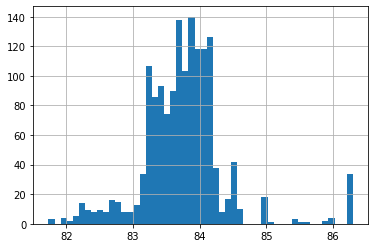

In [119]:
# how to use pandas and seaborn to make histogram
# https://cmdlinetips.com/2019/02/how-to-make-histogram-in-python-with-pandas-and-seaborn/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#header =1 or skiprows=1
# df = pd.read_csv("~/Dropbox/R4Trading/courseofsalecode/tls20171019.csv",header=1)

#file = '/home/tester/GitHub/AlgoTrading/CourseOfSale/Course_of_sales_VAS_09Mar2020.csv'
stock = 'VAP'
date = '10Mar2020'
file = '/home/tester/GitHub/AlgoTrading/CourseOfSale/data/Course_of_sales_' + stock + '_' + date + '.csv'
 
df = pd.read_csv(file,header=1)  # remove header
df = pd.read_csv(file) # keep header
print(df)

df.head(2)

df['Price $']

df['Price $'].hist(bins=50)


# add period / hours column by extracting hours from time column string
# https://datatofish.com/string-to-integer-dataframe/

df['Period']= df['Time'].str.split("\:",n = 1, expand = True)[0] 

# 'PoD': part of day (Morning or Afternoon)
df['PoD'] = 'x'
df.head(2)

# # https://stackoverflow.com/questions/23330654/update-a-dataframe-in-pandas-while-iterating-row-by-row
for index, row in df.iterrows():
    if int(row['Period']) >= 8 and int(row['Period']) <= 12:
        # row['PoD'] = 'Morning' # does not set the df
        df.at[index,'PoD'] = 'Morning' # this sets the df
    elif int(row['Period']) >= 1 and int(row['Period']) <= 6:
        #row['PoD'] = 'Afternoon'
        df.at[index,'PoD'] = 'afternoon' # this sets the df

df.head(2)
    

In [120]:
# # add period / hours column by extracting hours from time column string
# [0] get the first list item after spliting the string delimited by ':'

df['Period']= df['Time'].str.split("\:",n = 1, expand = True)[0] 
df.head(2)

,Time,Price $,Volume,Value $,Market,Condition,Period,PoD
0,4:10:40 PM,84.99,17,1444.83,ASX,NaN,4,afternoon
1,3:59:55 PM,84.34,22,1855.48,ASX,NaN,3,afternoon


In [121]:
from datetime import datetime

# https://thispointer.com/python-how-to-convert-a-timestamp-string-to-a-datetime-object-using-datetime-strptime/

#df['Period'] = df['Time'].strftime("%H:%M:%S")

 
# datetimeObj = datetime.strptime('2018-09-11T15::11::45.456777', '%Y-%m-%dT%H::%M::%S.%f')

# https://www.geeksforgeeks.org/python-string-split/
def returnHour(df):
    for each in df:
        # print(each)
        # datetimeobj = datetime.strptime(each,'%H:%M:%S %s')
        # Splitting at ':' 
        each.split(':') 
        H = each.split(':')[0]
        #print(H)
        #return H
 
returnHour(df['Time'])
 
    
# https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
df["Period"]= df["Time"].str.split("\:", n = 1, expand = True) 
df.head(-5)


,Time,Price $,Volume,Value $,Market,Condition,Period,PoD
0,4:10:40 PM,84.99,17,1444.83,ASX,NaN,4,afternoon
1,3:59:55 PM,84.34,22,1855.48,ASX,NaN,3,afternoon
2,3:59:49 PM,84.38,27,2278.26,ASX,NaN,3,afternoon
3,3:59:47 PM,84.13,1793,150845.09,ASX,NaN,3,afternoon
4,3:59:47 PM,84.13,849,71426.37,ASX,NaN,3,afternoon
...,...,...,...,...,...,...,...,...
1518,10:00:10 AM,86.30,160,13808.00,ASX,NaN,10,Morning
1519,10:00:10 AM,86.30,11,949.30,ASX,XT,10,Morning
1520,10:00:10 AM,86.30,11,949.30,ASX,XT,10,Morning
1521,10:00:10 AM,86.30,7,604.10,ASX,XT,10,Morning


In [122]:
#file = "/home/tester/GitHub/AlgoTrading/CourseOfSale/Course_of_sales_VAS_09Mar2020.csv"
#df = pd.read_csv(file,skiprows=1,header=None, names=['time','price','volume','value','condition']
#df = pd.read_csv(file,skiprows=1,header=None, names=['time','price','volume','value','condition']
#print(df)
                 # print(df['time'])
# df.head(2)
# df['price']


In [123]:
# df['price']

# df['price'].hist(bins=20)

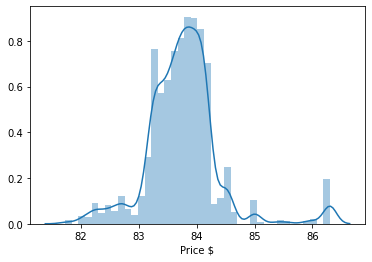

In [124]:
# how to use pandas and seaborn to make distribution plot


sns.distplot(df['Price $'], bins=40)

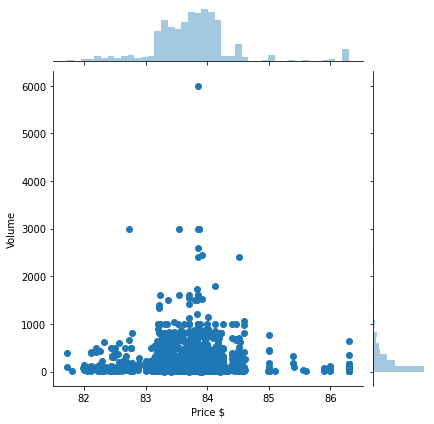

In [125]:
sns.jointplot(x=df['Price $'], y=df['Volume'], data=df)


In [126]:
#### price_group= df.groupby(['price','volume'])

price_group= df.groupby('Price $')    # or['price']
pg = price_group.size()

volume_group= df.groupby('Volume')    # or['price']
vg = volume_group.size()

print(pg)
print(vg)

Price $
81.73     2
81.80     1
81.99     1
82.00     3
82.05     2
         ..
85.55     1
85.60     1
85.90     2
86.00     4
86.30    34
Length: 207, dtype: int64
Volume
1       6
2       6
3       4
4       5
5       3
       ..
2437    1
2600    1
2983    1
3000    4
6000    1
Length: 502, dtype: int64


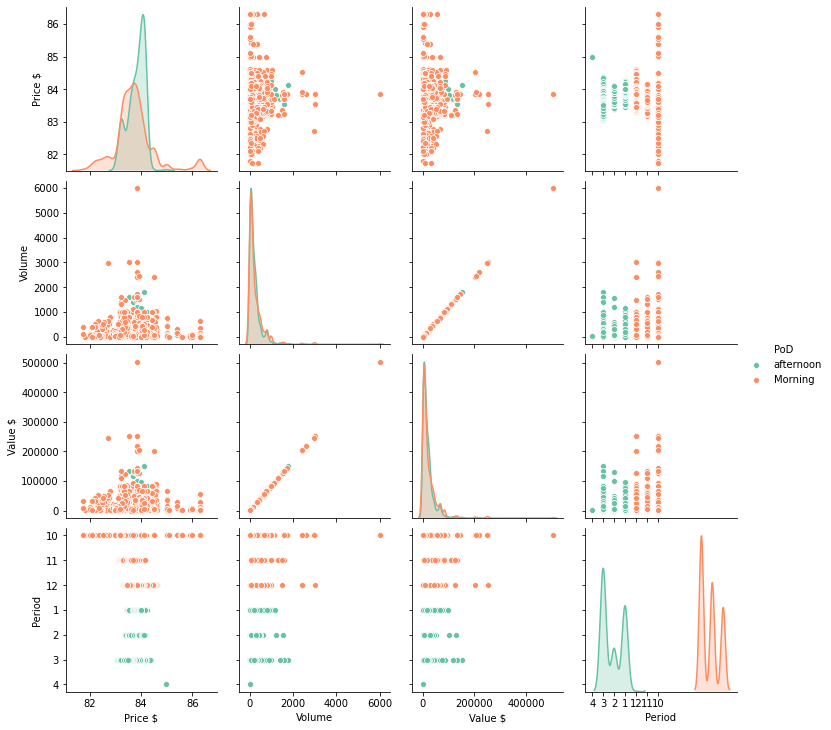

In [127]:
g = sns.pairplot(df, hue="PoD", palette="Set2", diag_kind="kde", height=2.5)
 
# g = sns.pairplot(df)

In [128]:
# g = sns.FacetGrid(df['Close'], col="Period")
g = sns.FacetGrid(df, col = "Close")
g.map(plt.hist, "Period");

KeyError: 'Close'